In [1]:
import sys
sys.path.insert(0, '..')

import PipelineTS
PipelineTS.__version__

'0.3.8'

# Quick Start

In [10]:
import pandas as pd

# list all available models
from PipelineTS.dataset import LoadWebSales
from PipelineTS.plot import plot_data_period

init_data = LoadWebSales()[['date', 'type_a']]
init_data['date'] = pd.to_datetime(init_data['date'])
valid_data = init_data.iloc[-30:, :]
data = init_data.iloc[:-30, :]
accelerator = 'auto'  
n = 30

from PipelineTS.pipeline import ModelPipeline

ModelPipeline.list_all_available_models()

['auto_arima',
 'catboost',
 'lightgbm',
 'xgboost',
 'wide_gbrt',
 'd_linear',
 'n_linear',
 'n_beats',
 'n_hits',
 'tcn',
 'tft',
 'gau',
 'stacking_rnn',
 'time2vec',
 'multi_output_model',
 'multi_step_model',
 'transformer',
 'random_forest',
 'tide',
 'seg_rnn',
 'prophet']

# Training

In [3]:
from sklearn.metrics import mean_absolute_error

pipeline = ModelPipeline(
    time_col='date',
    target_col='type_a',
    lags=30,
    random_state=42,
    metric=mean_absolute_error,
    metric_less_is_better=True,
    accelerator=accelerator,
    n_hits__accelerator='cpu', # Since using mps backend for n_hits model on mac gives an error, cpu backend is used as an alternative
    tft__accelerator='cpu',
    # Disable printing of information during the model training process.
    multi_output_model__verbose=-1,
    multi_step_model__verbose=-1
)

# training all models
pipeline.fit(data, valid_data=valid_data)

# use best model to predict next 30 steps data point
res = pipeline.predict(30)

11:09:29 2023-10-31 - PipelineTS - There are a total of 21 models to be trained.
11:09:29 2023-10-31 - PipelineTS - [model  0] fitting and evaluating auto_arima...
11:11:21 2023-10-31 - PipelineTS - [model  1] fitting and evaluating catboost...
11:12:11 2023-10-31 - PipelineTS - [model  2] fitting and evaluating d_linear...
11:13:02 2023-10-31 - PipelineTS - [model  3] fitting and evaluating gau...
11:14:05 2023-10-31 - PipelineTS - [model  4] fitting and evaluating lightgbm...
11:14:28 2023-10-31 - PipelineTS - [model  5] fitting and evaluating multi_output_model...
11:14:47 2023-10-31 - PipelineTS - [model  6] fitting and evaluating multi_step_model...
11:14:57 2023-10-31 - PipelineTS - [model  7] fitting and evaluating n_beats...
11:16:43 2023-10-31 - PipelineTS - [model  8] fitting and evaluating n_hits...
11:17:42 2023-10-31 - PipelineTS - [model  9] fitting and evaluating n_linear...
11:18:22 2023-10-31 - PipelineTS - [model 10] fitting and evaluating prophet...
11:18:31 2023-10-

# Plotting the forecast results

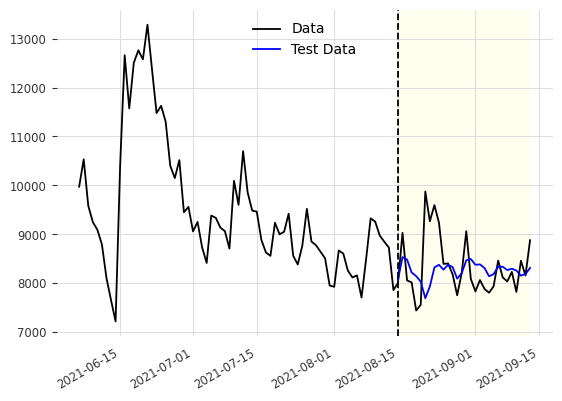

In [11]:
# use best model to predict next 30 steps data point
# You can use `model_name` to specify the pre-trained model in the pipeline when using Python.
prediction = pipeline.predict(n, model_name=None)  

plot_data_period(init_data.iloc[-100:, :], prediction, 
                 time_col='date', target_col='type_a')